In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
from sklearn import linear_model
import time
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Household power consumption

In [2]:
## Load data and preprocessing
data = pd.read_csv("data/household_power_consumption.txt",delimiter = ";")
data = data.dropna()
print(len(data))
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2049280


Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [3]:
# Uncomment to compute correlation
#N = 10000
#df_corr = data[["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]][0:N].apply(pd.to_numeric, errors='coerce', axis=1)
#print(abs(df_corr.corr(method ='pearson')).sum(axis = 0))

In [13]:
# Preprocess date-time
X_date_time = data[["Date","Time"]]
N = len(X_date_time)
Day = np.empty([N])
Month = np.empty([N])
Year = np.empty([N])
Hour = np.empty([N])
Minute = np.empty([N])

for i in range(N):
    tmp = np.array(X_date_time.iloc[i,0].split("/"))
    tmp2 = np.array(X_date_time.iloc[i,1].split(":"))
    Day[i] = tmp[0].astype(float)
    Month[i] = tmp[1].astype(float)
    Year[i] = tmp[2].astype(float)
    Hour[i] = tmp2[0].astype(float)  
    Minute[i] = tmp2[1].astype(float)

X_col = ["Global_active_power","Global_reactive_power","Voltage","Sub_metering_1","Sub_metering_2","Sub_metering_3"]
y_col = "Global_intensity" # Taking Global intensity as y cause is the most correlated
col = np.append(X_col,y_col)
df = data[col].astype(np.float64)
X = df[X_col]
X["Day"] = Day
X["Month"] = Month
X["Year"] = Year
X["Hour"] = Hour
X["Minute"] = Minute
X = np.array(X)
y = np.array(df[y_col])
l = 0.1
Lambda = l*np.eye(X.shape[1], dtype=float)

MSE closed form = 0.000792513203009251
Time employed for optimization time in closed form = 0.14054036140441895


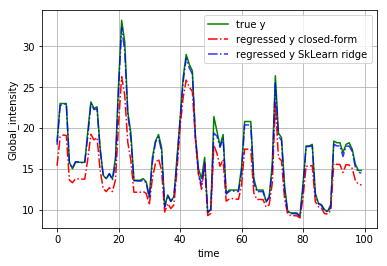

In [14]:
# Closed form solution 
start = time.time()
w_star = np.dot(np.linalg.inv(np.dot(X.T,X)+N*Lambda),np.dot(X.T,y))
end = time.time()
# Verifying Regression
plt.figure()
y_hat = np.dot(X,w_star)
print("MSE closed form =",1/len(data)*np.square(np.sum(y-y_hat)))
plt.plot(y[0:100],'g-',label="true y",alpha=1)
plt.plot(y_hat[0:100],'r-.',label = "regressed y closed-form")
# Optimal linear regressor
reg = linear_model.Ridge(alpha=0)
start = time.time()
reg.fit(X,y)
end = time.time()
# Verifying Regression
y_hat = reg.predict(X)
plt.plot(y_hat[0:100],'b-.',label = "regressed y SkLearn ridge",alpha=0.8)

plt.xlabel("time")
plt.ylabel(str(y_col))
plt.legend()
plt.grid()

print("Time employed for optimization time in closed form =",end - start)
plt.savefig("house_hold_a.png",dpi=1000)

MSE optimal solution = 1.9884640872050654e-26
Time employed for optimization time with sklearn Ridge regressor = 0.15038013458251953


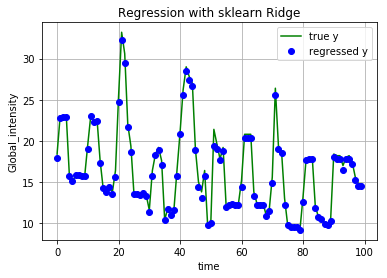

In [15]:
# Optimal linear regressor
reg = linear_model.Ridge(alpha=0)
start = time.time()
reg.fit(X,y)
end = time.time()
# Verifying Regression
plt.figure()
y_hat = reg.predict(X)
print("MSE optimal solution =",1/len(data)*np.square(np.sum(y-y_hat)))
plt.plot(y[0:100],'g-',label="true y")
plt.plot(y_hat[0:100],'bo',label = "regressed y")
plt.title("Regression with sklearn Ridge")
plt.xlabel("time")
plt.ylabel(str(y_col))
print("Time employed for optimization time with sklearn Ridge regressor =",end - start)
plt.legend()
plt.grid()
plt.savefig("house_hold_b.png",dpi=1000)

# Greenhouse Gas Observing Network

In [5]:
path = 'data/ghg_data/'
all_files = glob.glob(path + "/*.dat")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,delimiter = " ",header = None)
    li.append(df)
new_frame = pd.concat(li, axis=1, ignore_index=True)
new_frame = new_frame.dropna(axis="rows")
new_frame = new_frame.T

In [6]:
# Uncomment to compute correlation
#N = len(frame)
#df_corr = frame[0:N].apply(pd.to_numeric, errors='coerce', axis=1)
##print(abs(df_corr.corr(method ='pearson')).sum(axis = 0))
#print(np.argmax(abs(df_corr.corr(method ='pearson')).sum(axis = 0)))
y_col = 15
X_col = new_frame.columns.delete(y_col)

col = np.append(X_col,y_col)
df = new_frame[col].astype(np.float64)
X = np.array(df[X_col])
y = np.array(df[y_col])
l = 0.01 
Lambda = l*np.eye(X.shape[1], dtype=float)
N = len(X)

MSE closed form = 5327766.8834949015
Time employed for optimization time in closed form = 0.04693293571472168


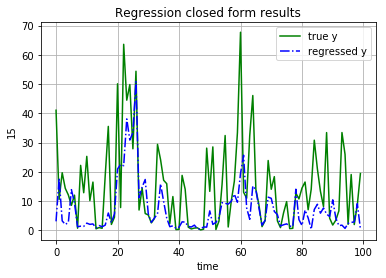

In [9]:
# Closed form solution 
start = time.time()
w_star = np.dot(np.linalg.inv(np.dot(X.T,X)+N*Lambda),np.dot(X.T,y))
end = time.time()
# Verifying Regression
plt.figure()
y_hat_closed = np.dot(X,w_star)
print("MSE closed form =",1/len(y)*np.square(np.sum(y-y_hat_closed)))
plt.plot(y[0:100],'g-',label="true y")
plt.plot(y_hat_closed[0:100],'b-.',label = "regressed y")
plt.title("Regression closed form results")
plt.xlabel("time")
plt.ylabel(str(y_col))
plt.legend()
plt.grid()
print("Time employed for optimization time in closed form =",end - start)

MSE optimal solution = 4.579281149160004e-22
Time employed for optimization time with sklearn Ridge regressor = 0.10833096504211426


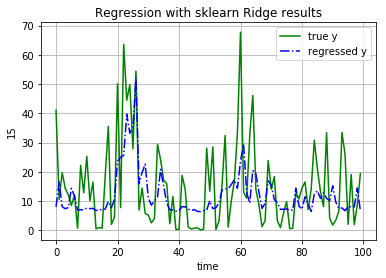

In [10]:
# Optimal linear regressor
reg = linear_model.Ridge(alpha=0)
start = time.time()
reg.fit(X,y)
end = time.time()
# Verifying Regression
plt.figure()
y_hat = reg.predict(X)
print("MSE optimal solution =",1/len(y)*np.square(np.sum(y-y_hat)))
plt.plot(y[0:100],'g-',label="true y")
plt.plot(y_hat[0:100],'b-.',label = "regressed y")
plt.title("Regression with sklearn Ridge results")
plt.xlabel("time")
plt.ylabel(str(y_col))
print("Time employed for optimization time with sklearn Ridge regressor =",end - start)
plt.legend()
plt.grid()

MSE closed form = 2483265.8840213027
Time employed for optimization time in closed form = 0.10104608535766602


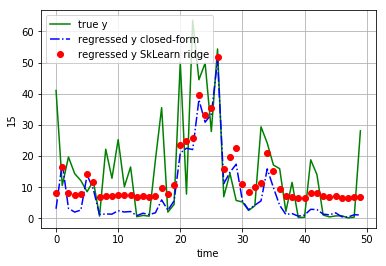

In [11]:
# Closed form solution 
start = time.time()
w_star = np.dot(np.linalg.inv(np.dot(X.T,X)+N*Lambda),np.dot(X.T,y))
end = time.time()
# Verifying Regression
plt.figure()
y_hat = np.dot(X,w_star)
print("MSE closed form =",1/len(data)*np.square(np.sum(y-y_hat)))
plt.plot(y[0:50],'g-',label="true y")
plt.plot(y_hat[0:50],'b-.',label = "regressed y closed-form")
# Optimal linear regressor
reg = linear_model.Ridge(alpha=0)
start = time.time()
reg.fit(X,y)
end = time.time()
# Verifying Regression

y_hat = reg.predict(X)
plt.plot(y_hat[0:50],'ro',label = "regressed y SkLearn ridge")


plt.xlabel("time")
plt.ylabel(str(y_col))
plt.legend()
plt.grid()

print("Time employed for optimization time in closed form =",end - start)
plt.savefig("gas_a.png",dpi=1000)